In [8]:
import numpy as np
from time import process_time as pt
from matplotlib import pyplot as plt

In [2]:
def leftReflectMult(A,w):
    w /= np.linalg.norm(w)
    A = A - 2*np.outer(w,w@A)

In [3]:
def rightReflectMult(A,w):
    w /= np.linalg.norm(w)
    A = A - 2*np.outer(A@w,w)

In [4]:
def sgn(x):
  if x ==0:
    return 1
  else:
    return np.sign(x)

In [5]:
def myHess(A):
  m,n=A.shape
  B=np.copy(A)
  qz = np.zeros((m,n))
  for i in range(n-2):
    t = np.linalg.norm(B[i+1:,i])
    qz[i+1:,i] = B[i+1:, i]
    qz[i+1,i] += sgn(B[i+1,i])*t
    w = qz[i+1:,i]
    w /= np.linalg.norm(qz[i+1:,i])
    B[i+1:, i:] -= 2*np.outer(w, w@B[i+1:, i:])
    B[:, i+1:] -= 2*np.outer(B[:, i+1:]@w, w)
  return B


In [6]:
P=np.random.rand(50,50)
d=np.random.rand(50)
A=np.linalg.inv(P)@np.diag(d)@P
d.sort()
H=myHess(A)
eigen=np.linalg.eigvals(H)
eigen.sort()
print(np.allclose(eigen,d))
print(np.allclose(np.zeros((49,49)),np.tril(H[1:,:49],-1)))

True
True


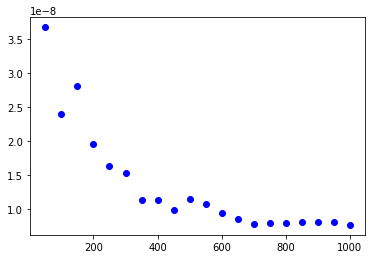

In [9]:
n=20
k=50
times=np.zeros(n)
x=np.linspace(k,k*n,num=n)
for i in range(n):
  A=np.random.rand(k+i*k,k+i*k)
  start=pt()
  myHess(A)
  times[i]=(pt()-start)/(k+i*k)**3
plt.plot(x,times,"bo")